In [2]:
from sklearn.metrics import accuracy_score

from data.mnist_seven import MNISTSeven
from model.stupid_recognizer import StupidRecognizer
from model.perceptron import Perceptron
from report.evaluator import Evaluator

data = MNISTSeven("../data/mnist_seven.csv", 3000, 1000, 1000)

def evaluate_perceptron(learning_rate, num_epochs):
    myPerceptronClassifier = Perceptron(data.trainingSet,
                                        data.validationSet,
                                        data.testSet,
                                        learningRate=learning_rate,
                                        epochs=num_epochs)
    myPerceptronClassifier.train()
    perceptronPred = myPerceptronClassifier.evaluate()
    accuracy = accuracy_score(data.testSet.label, perceptronPred)*100
    return accuracy

Loading data from ../data/mnist_seven.csv...
Data loaded.


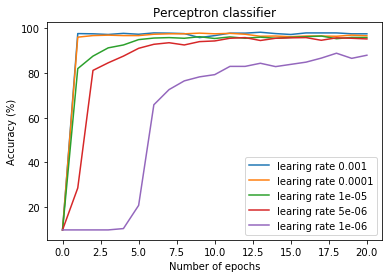

In [4]:
from matplotlib import pyplot

a_values = (0.001, 0.0001, 0.00001, 0.000005, 0.000001)
x = list(range(21))
for a in a_values:
    y = [evaluate_perceptron(a, xi) for xi in x]
    pyplot.plot(x, y, label="learing rate {}".format(a))
pyplot.legend()
pyplot.title("Perceptron classifier")
pyplot.xlabel('Number of epochs')
pyplot.ylabel('Accuracy (%)')
pyplot.show()